In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import _config

In [3]:
input_taz_shapefile_folder = _config.input_taz_shapefile_folder
taz_shapefile = _config.taz_shapefile
se_years = _config.se_years
input_model_se_folder = _config.input_model_se_folder
se_base_year = _config.se_base_year
df_centers = _config.df_centers

,index,N,project_id,nearest_AreaType,TAZID,ACRES,area_sqm,area_acres,geometry
0,1,10046,1,Neighborhood Center,367,116.470509,27442.266223,6.781132,"POLYGON ((417673.698 4563966.754, 417670.801 4..."
1,1,10046,1,Neighborhood Center,368,50.056932,34066.705401,8.418066,"POLYGON ((417794.017 4564191.855, 417812.604 4..."
2,1,10046,1,Neighborhood Center,369,26.905027,19934.704560,4.925973,"POLYGON ((418071.199 4563986.282, 418068.302 4..."
3,1,10046,1,Neighborhood Center,388,350.740952,20979.132171,5.184056,"POLYGON ((417851.282 4563805.801, 417831.754 4..."
4,1,10046,1,Neighborhood Center,390,37.583728,24508.174705,6.056102,"POLYGON ((418063.505 4563947.604, 418056.855 4..."
...,...,...,...,...,...,...,...,...,...
164,43,27575,3,Urban Center,660,214.511206,145066.152805,35.846627,"POLYGON ((415723.125 4549909.935, 415717.331 4..."
165,41,27479,3,Urban Center,702,330.569711,171252.081197,42.317311,"POLYGON ((415831.398 4549099.564, 415825.604 4..."
166,41,27479,3,Urban Center,703,271.852095,799.934731,0.197668,"POLYGON ((415765.529 4549362.525, 415785.828 4..."
167,41,27479,3,Urban Center,709,165.899429,34.043252,0.008412,"POLYGON ((415422.269 4548737.094, 415422.400 4..."


<AxesSubplot:>

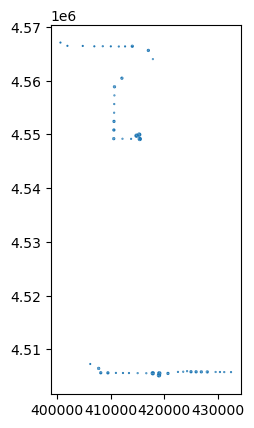

In [4]:
gdf_buffered_stops_with_centers_taz = gpd.read_file("intermediate/buffered-stops-with-centers-taz.geojson")
display(gdf_buffered_stops_with_centers_taz)
gdf_buffered_stops_with_centers_taz.plot()

In [19]:
# read proportions from REMM data
df_percent_changeable = pd.read_csv('intermediate/percent-changeable.csv')
display(df_percent_changeable)
df_area_ratio_of_taz = pd.read_csv('intermediate/area-ratio-of-taz.csv')
display(df_area_ratio_of_taz)

,N,project_id,TAZID,percent_changeable
0,10036,3.0,657.0,1.000000
1,10036,3.0,658.0,1.000000
2,10036,3.0,663.0,1.000000
3,10036,3.0,664.0,1.000000
4,10046,1.0,367.0,1.000000
...,...,...,...,...
164,27931,3.0,508.0,0.060868
165,28117,3.0,468.0,1.000000
166,28117,3.0,473.0,1.000000
167,28117,3.0,497.0,0.827711


,TAZID,N,project_id,TOTEMP,TOTHH
0,165.0,-1.0,-1.0,0.991571,1.000000
1,165.0,15191.0,1.0,0.008429,0.000000
2,172.0,-1.0,-1.0,0.000000,0.971864
3,172.0,15185.0,1.0,0.000000,0.028136
4,173.0,-1.0,-1.0,0.000000,0.996895
...,...,...,...,...,...
300,1520.0,25215.0,2.0,0.094940,0.002611
301,1520.0,25351.0,2.0,0.178776,0.057933
302,1521.0,-1.0,-1.0,0.794731,0.897466
303,1521.0,25351.0,2.0,0.205269,0.031773


In [45]:
# get SE data
df_se_data = pd.DataFrame()

for se_year in se_years:
    file = "SE_" + str(se_year) + '.csv'
    se_file = os.path.join(input_model_se_folder, file)

    _dbf = pd.read_csv(se_file)

    # Identify non-numeric columns
    non_numeric_columns = _dbf.select_dtypes(include=[int, float]).columns.tolist()
    non_numeric_columns.remove(';TAZID')  # Keep 'TAZID' as identifier variable

    _df_pivot = _dbf.melt(id_vars=[';TAZID'], value_vars=non_numeric_columns)

    _df_pivot['se_year'] = se_year

    if se_year==se_base_year:
        df_se_data_base = _df_pivot
    else:
        df_se_data = pd.concat([df_se_data,_df_pivot])

df_se_data_base.columns = df_se_data_base.columns + '_B'
df_se_data.columns = df_se_data.columns + '_F'

df_se_data_base.rename(columns={';TAZID_B':'TAZID','variable_B':'parameter'}, inplace=True)
df_se_data.rename(columns={';TAZID_F':'TAZID','variable_F':'parameter'}, inplace=True)

display(df_se_data_base)
display(df_se_data)

,TAZID,parameter,value_B,se_year_B
0,1,CO_TAZID,30001.0,2023
1,2,CO_TAZID,30002.0,2023
2,3,CO_TAZID,30003.0,2023
3,4,CO_TAZID,30004.0,2023
4,5,CO_TAZID,30005.0,2023
...,...,...,...,...
92191,3542,CO_FIPS,49.0,2023
92192,3543,CO_FIPS,49.0,2023
92193,3544,CO_FIPS,49.0,2023
92194,3545,CO_FIPS,49.0,2023


,TAZID,parameter,value_F,se_year_F
0,1,CO_TAZID,30001.0,2032
1,2,CO_TAZID,30002.0,2032
2,3,CO_TAZID,30003.0,2032
3,4,CO_TAZID,30004.0,2032
4,5,CO_TAZID,30005.0,2032
...,...,...,...,...
92191,3542,CO_FIPS,49.0,2050
92192,3543,CO_FIPS,49.0,2050
92193,3544,CO_FIPS,49.0,2050
92194,3545,CO_FIPS,49.0,2050


In [47]:
df_se_growth = pd.merge(df_se_data, df_se_data_base, on=['TAZID','parameter'])
df_se_growth['growth'] = df_se_growth['value_F'] - df_se_growth['value_B']
df_se_growth = df_se_growth[df_se_growth['parameter'].isin(['TOTHH','TOTEMP'])]
df_se_growth

,TAZID,parameter,value_F,se_year_F,value_B,se_year_B,growth
10638,1,TOTHH,0.0,2032,0.0,2023,0.0
10639,1,TOTHH,0.0,2042,0.0,2023,0.0
10640,1,TOTHH,0.0,2050,0.0,2023,0.0
10641,2,TOTHH,17.4,2032,13.0,2023,4.4
10642,2,TOTHH,29.8,2042,13.0,2023,16.8
...,...,...,...,...,...,...,...
53185,3545,TOTEMP,0.0,2042,0.0,2023,0.0
53186,3545,TOTEMP,0.0,2050,0.0,2023,0.0
53187,3546,TOTEMP,0.0,2032,0.0,2023,0.0
53188,3546,TOTEMP,0.0,2042,0.0,2023,0.0


In [15]:
gdf_buffered_stops_with_centers_taz

,index,N,project_id,nearest_AreaType,TAZID,ACRES,area_sqm,area_acres,geometry
0,1,10046,1,Neighborhood Center,367,116.470509,27442.266223,6.781132,"POLYGON ((417673.698 4563966.754, 417670.801 4..."
1,1,10046,1,Neighborhood Center,368,50.056932,34066.705401,8.418066,"POLYGON ((417794.017 4564191.855, 417812.604 4..."
2,1,10046,1,Neighborhood Center,369,26.905027,19934.704560,4.925973,"POLYGON ((418071.199 4563986.282, 418068.302 4..."
3,1,10046,1,Neighborhood Center,388,350.740952,20979.132171,5.184056,"POLYGON ((417851.282 4563805.801, 417831.754 4..."
4,1,10046,1,Neighborhood Center,390,37.583728,24508.174705,6.056102,"POLYGON ((418063.505 4563947.604, 418056.855 4..."
...,...,...,...,...,...,...,...,...,...
164,43,27575,3,Urban Center,660,214.511206,145066.152805,35.846627,"POLYGON ((415723.125 4549909.935, 415717.331 4..."
165,41,27479,3,Urban Center,702,330.569711,171252.081197,42.317311,"POLYGON ((415831.398 4549099.564, 415825.604 4..."
166,41,27479,3,Urban Center,703,271.852095,799.934731,0.197668,"POLYGON ((415765.529 4549362.525, 415785.828 4..."
167,41,27479,3,Urban Center,709,165.899429,34.043252,0.008412,"POLYGON ((415422.269 4548737.094, 415422.400 4..."


In [31]:
gdf_buffered_stops_with_centers_taz_changeable = pd.merge(gdf_buffered_stops_with_centers_taz, df_percent_changeable, on=['N','project_id','TAZID'], how='left')
gdf_buffered_stops_with_centers_taz_changeable_ratios = pd.merge(gdf_buffered_stops_with_centers_taz_changeable, df_area_ratio_of_taz, on=['N','project_id','TAZID'], how='left')
gdf_buffered_stops_with_centers_taz_changeable_ratios.fillna(0, inplace=True)
gdf_buffered_stops_with_centers_taz_changeable_ratios = gdf_buffered_stops_with_centers_taz_changeable_ratios.melt(id_vars=['index','N','project_id','nearest_AreaType','TAZID','ACRES','area_sqm','area_acres','geometry','percent_changeable'],var_name='parameter',value_name='portion_taz_growth')
gdf_buffered_stops_with_centers_taz_changeable_ratios

,index,N,project_id,nearest_AreaType,TAZID,ACRES,area_sqm,area_acres,geometry,percent_changeable,parameter,portion_taz_growth
0,1,10046,1,Neighborhood Center,367,116.470509,27442.266223,6.781132,"POLYGON ((417673.698 4563966.754, 417670.801 4...",1.0,TOTEMP,0.037572
1,1,10046,1,Neighborhood Center,368,50.056932,34066.705401,8.418066,"POLYGON ((417794.017 4564191.855, 417812.604 4...",1.0,TOTEMP,0.000000
2,1,10046,1,Neighborhood Center,369,26.905027,19934.704560,4.925973,"POLYGON ((418071.199 4563986.282, 418068.302 4...",1.0,TOTEMP,0.178206
3,1,10046,1,Neighborhood Center,388,350.740952,20979.132171,5.184056,"POLYGON ((417851.282 4563805.801, 417831.754 4...",1.0,TOTEMP,0.000000
4,1,10046,1,Neighborhood Center,390,37.583728,24508.174705,6.056102,"POLYGON ((418063.505 4563947.604, 418056.855 4...",1.0,TOTEMP,0.105481
...,...,...,...,...,...,...,...,...,...,...,...,...
333,43,27575,3,Urban Center,660,214.511206,145066.152805,35.846627,"POLYGON ((415723.125 4549909.935, 415717.331 4...",1.0,TOTHH,0.246911
334,41,27479,3,Urban Center,702,330.569711,171252.081197,42.317311,"POLYGON ((415831.398 4549099.564, 415825.604 4...",1.0,TOTHH,0.143866
335,41,27479,3,Urban Center,703,271.852095,799.934731,0.197668,"POLYGON ((415765.529 4549362.525, 415785.828 4...",1.0,TOTHH,0.000000
336,41,27479,3,Urban Center,709,165.899429,34.043252,0.008412,"POLYGON ((415422.269 4548737.094, 415422.400 4...",1.0,TOTHH,0.000000


In [29]:
df_centers

Parameter,center_type,FAR,bldg_size,size_of_hh_units,sf_per_employee,units_per_acre,sf_per_acre,%_residential,%_non_res,"gross_to_net_conversion_(streets,_etc)",final_units_per_acre,final_emps_per_acre,application_area,application_area_miles
0,Neighborhood Center,0.6,26136,1000,500,26.136,52.27,0.85,0.15,0.8,18,6,1/8 mile radius,0.125
1,City Center,1.13,49222.8,850,450,57.909176,109.38,0.85,0.15,0.8,39,13,990 foot radius,0.1875
2,Urban Center,1.5,65340,750,400,87.12,163.35,0.85,0.15,0.8,59,20,1/4 mile radius,0.25


In [36]:
_df = df_centers.copy()
_df.rename(columns={'final_units_per_acre':'TOTHH','final_emps_per_acre':'TOTEMP'}, inplace=True)
df_centers_max_per_acre = _df.melt(id_vars='center_type',var_name='parameter', value_vars=['TOTHH','TOTEMP'], value_name='max_per_acre')
df_centers_max_per_acre

,center_type,parameter,max_per_acre
0,Neighborhood Center,TOTHH,18
1,City Center,TOTHH,39
2,Urban Center,TOTHH,59
3,Neighborhood Center,TOTEMP,6
4,City Center,TOTEMP,13
5,Urban Center,TOTEMP,20


In [21]:
df_centers

Parameter,center_type,FAR,bldg_size,size_of_hh_units,sf_per_employee,units_per_acre,sf_per_acre,%_residential,%_non_res,"gross_to_net_conversion_(streets,_etc)",final_units_per_acre,final_emps_per_acre,application_area,application_area_miles
0,Neighborhood Center,0.6,26136,1000,500,26.136,52.27,0.85,0.15,0.8,18,6,1/8 mile radius,0.125
1,City Center,1.13,49222.8,850,450,57.909176,109.38,0.85,0.15,0.8,39,13,990 foot radius,0.1875
2,Urban Center,1.5,65340,750,400,87.12,163.35,0.85,0.15,0.8,59,20,1/4 mile radius,0.25


In [49]:
gdf_stop_taz_calcs = pd.merge(gdf_buffered_stops_with_centers_taz_changeable_ratios, df_centers_max_per_acre, left_on=('nearest_AreaType', 'parameter'), right_on=('center_type','parameter'))
gdf_stop_taz_calcs_se = pd.merge(gdf_stop_taz_calcs, df_se_growth, on=['TAZID','parameter'])
gdf_stop_taz_calcs_se

,index,N,project_id,nearest_AreaType,TAZID,ACRES,area_sqm,area_acres,geometry,percent_changeable,parameter,portion_taz_growth,center_type,max_per_acre,value_F,se_year_F,value_B,se_year_B,growth
0,1,10046,1,Neighborhood Center,367,116.470509,27442.266223,6.781132,"POLYGON ((417673.698 4563966.754, 417670.801 4...",1.0,TOTEMP,0.037572,Neighborhood Center,6,93.333333,2032,90.000000,2023,3.333333
1,1,10046,1,Neighborhood Center,367,116.470509,27442.266223,6.781132,"POLYGON ((417673.698 4563966.754, 417670.801 4...",1.0,TOTEMP,0.037572,Neighborhood Center,6,96.833333,2042,90.000000,2023,6.833333
2,1,10046,1,Neighborhood Center,367,116.470509,27442.266223,6.781132,"POLYGON ((417673.698 4563966.754, 417670.801 4...",1.0,TOTEMP,0.037572,Neighborhood Center,6,100.166667,2050,90.000000,2023,10.166667
3,1,10046,1,Neighborhood Center,368,50.056932,34066.705401,8.418066,"POLYGON ((417794.017 4564191.855, 417812.604 4...",1.0,TOTEMP,0.000000,Neighborhood Center,6,143.166667,2032,101.000000,2023,42.166667
4,1,10046,1,Neighborhood Center,368,50.056932,34066.705401,8.418066,"POLYGON ((417794.017 4564191.855, 417812.604 4...",1.0,TOTEMP,0.000000,Neighborhood Center,6,199.500000,2042,101.000000,2023,98.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,41,27479,3,Urban Center,709,165.899429,34.043252,0.008412,"POLYGON ((415422.269 4548737.094, 415422.400 4...",1.0,TOTHH,0.000000,Urban Center,59,291.500000,2042,160.500000,2023,131.000000
1010,41,27479,3,Urban Center,709,165.899429,34.043252,0.008412,"POLYGON ((415422.269 4548737.094, 415422.400 4...",1.0,TOTHH,0.000000,Urban Center,59,336.500000,2050,160.500000,2023,176.000000
1011,43,27575,3,Urban Center,659,83.003657,107228.808161,26.496816,"POLYGON ((415099.202 4550283.900, 415133.068 4...",1.0,TOTHH,0.486080,Urban Center,59,352.666667,2032,234.333333,2023,118.333333
1012,43,27575,3,Urban Center,659,83.003657,107228.808161,26.496816,"POLYGON ((415099.202 4550283.900, 415133.068 4...",1.0,TOTHH,0.486080,Urban Center,59,460.500000,2042,234.333333,2023,226.166667


In [51]:
gdf_stop_taz_calcs_se[gdf_stop_taz_calcs_se['TAZID']==368]

,index,N,project_id,nearest_AreaType,TAZID,ACRES,area_sqm,area_acres,geometry,percent_changeable,parameter,portion_taz_growth,center_type,max_per_acre,value_F,se_year_F,value_B,se_year_B,growth
3,1,10046,1,Neighborhood Center,368,50.056932,34066.705401,8.418066,"POLYGON ((417794.017 4564191.855, 417812.604 4...",1.0,TOTEMP,0.0,Neighborhood Center,6,143.166667,2032,101.000000,2023,42.166667
4,1,10046,1,Neighborhood Center,368,50.056932,34066.705401,8.418066,"POLYGON ((417794.017 4564191.855, 417812.604 4...",1.0,TOTEMP,0.0,Neighborhood Center,6,199.500000,2042,101.000000,2023,98.500000
5,1,10046,1,Neighborhood Center,368,50.056932,34066.705401,8.418066,"POLYGON ((417794.017 4564191.855, 417812.604 4...",1.0,TOTEMP,0.0,Neighborhood Center,6,257.833333,2050,101.000000,2023,156.833333
510,1,10046,1,Neighborhood Center,368,50.056932,34066.705401,8.418066,"POLYGON ((417794.017 4564191.855, 417812.604 4...",1.0,TOTHH,0.0,Neighborhood Center,18,110.500000,2032,35.833333,2023,74.666667
511,1,10046,1,Neighborhood Center,368,50.056932,34066.705401,8.418066,"POLYGON ((417794.017 4564191.855, 417812.604 4...",1.0,TOTHH,0.0,Neighborhood Center,18,235.333333,2042,35.833333,2023,199.500000
512,1,10046,1,Neighborhood Center,368,50.056932,34066.705401,8.418066,"POLYGON ((417794.017 4564191.855, 417812.604 4...",1.0,TOTHH,0.0,Neighborhood Center,18,288.166667,2050,35.833333,2023,252.333333


<AxesSubplot:>

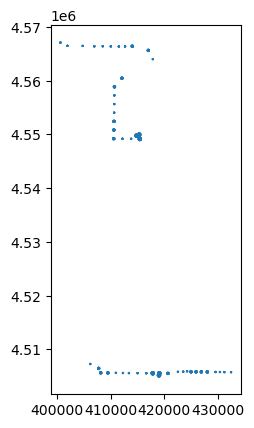

In [52]:
gdf_stop_taz_calcs_se.plot()